# Zadanie 1

Zadanie polega na obliczeniu całki
$$\int_{0}^{1}\frac{4}{1+x^2}dx$$
za pomocą trzech kwadratur złożonych - metody midpoint, metody trapezów oraz metody simpsona - oraz porównaniu wyników obliczeń z wynikiem rzeczywistym $\pi$. Wartości $\pi$ wykorzystana w obliczeniach została wzięta z biblioteki `numpy`

## Biblioteki i funkcje

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.special as sps

- `numpy` - biblioteka wykorzystana to obliczeń oraz dostarczająca wartość $\pi$
- `matplotlib.pyplot` - biblioteka służąca do rysowania wykresów
- `scipy.integrate` - biblioteka zawierjąca funkcje `trapezoid` oraz `simpson`, które implementują metodę trapezów oraz metodę simpsona
- `scipy.special` - wykorzystana została funkcja `legendre_roots`, która zwraca zadaną ilość punktów Legendre'a wraz z ich wagami, co jest wykorzystane w liczeniu całki metodą kwadratury Gaussa.

In [2]:
def f(x):
    return 4/(1+x*x)

def midpoint(x, y):
    dx = x[1] - x[0]
    return sum([y[i] * dx for i in range(len(y))])

- `f` - $f(x)=\frac{4}{1+x^2}$ - implementacja funkcji podcałkowej
- `midpoint` - implementacja liczenia całki metodą prostokątów

In [3]:
# do not run unless completely necessary
midpoint_error = []
trapz_error = []
simpson_error = []
for m in range(1, 26):
    base = np.linspace(start=0, stop=1, num=2**m+1)
    xs = np.array([(base[i] + base[i-1])/2 for i in range(1, len(base))])
    ys = f(xs)
    bys = f(base)
    midpoint_error.append((abs(midpoint(xs, ys) - np.pi) / np.pi) * 100)
    trapz_error.append((abs(spi.trapezoid(x=base, y=bys) - np.pi) / np.pi) * 100)
    simpson_error.append((abs(spi.simpson(x=base, y=bys) - np.pi) / np.pi) * 100)

Liczenie całki na 3 sposoby dla $2^m+1$ punktów, gdzie $m=1,...,25$. Przed wysłaniem punktów do funkcji midpoint należy obliczyć punkt środkowy każdego prostokąta. Dla każdego $m$ wyliczany jest błąd względny każdej metody, wyniki przechowywane są w tablicach `midpoint_error`, `trapz_error` oraz `simpson_error`.

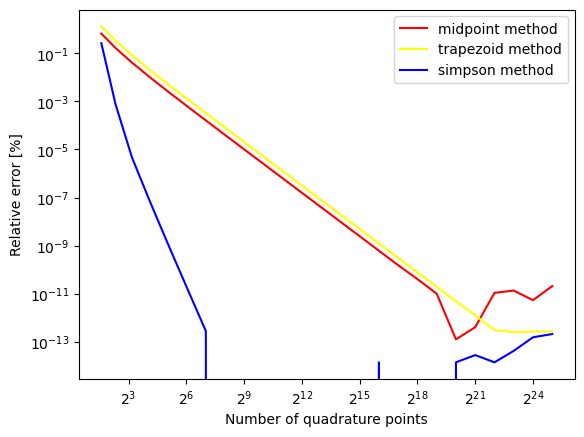

In [4]:
nodes = 1 + 2**np.array([i for i in range(1, 26)])
plt.plot(nodes, midpoint_error, label="midpoint method", color="red")
plt.plot(nodes, trapz_error, label="trapezoid method", color="yellow")
plt.plot(nodes, simpson_error, label="simpson method", color="blue")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of quadrature points")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 1** - Wykres przedstawiający wartość błędu względnego dla poszczególnych kwadratów w zależności od ilości punktów.

Na wykresie można zaobserwować moment, kiedy błąd numeryczny zaczyna przeważać nad błędem metody.

In [5]:
print("Minimal relative error for each method:")
print(f"midpoint method: {np.format_float_scientific(min(midpoint_error), precision=3)}%")
print(f"trapezoid method: {np.format_float_scientific(min(trapz_error), precision=3)}%")
print(f"simpson method: {min(simpson_error)}%")

Minimal relative error for each method:
midpoint method: 1.272e-13%
trapezoid method: 2.544e-13%
simpson method: 0.0%


Minimalne błędy względne:

- $1.272\cdot10^{-13}\%$ dla metody midpoint
- $2.544\cdot10^{-13}\%$ dla metody trapezów
- $0\%$ dla metody simpsona

Błąd równy $0\%$ dla metody simpsona oznacza, że dla danej reprezentacji `float64` została osiągnięta taka sama dokładność jaka jest w stałej `numpy.pi`

In [6]:
h_midpoint = 1/(1+2**(midpoint_error.index(min(midpoint_error)) - 1))
h_trapz = 1/(1+2**(trapz_error.index(min(trapz_error)) - 1))
h_simpson = 1/(1+2**(simpson_error.index(min(simpson_error)) - 1))

print("h with minimal errors:")
print(f"midpoint method: {np.format_float_scientific(h_midpoint, precision=3)}")
print(f"trapezoid method: {np.format_float_scientific(h_trapz, precision=3)}")
print(f"simpson method: {h_simpson:.3f}")

h with minimal errors:
midpoint method: 3.815e-06
trapezoid method: 4.768e-07
simpson method: 0.015


Długości przedziałów $h$, dla których błędy są najmniejsze

- $3.815\cdot10^-6$ dla metody midpoint
- $4.768\cdot10^-7$ dla metody trapezów
- $0.015$ dla metody simpsona

Wartość podana dla metody simpsona jest pierwszą wartościa, dla której wystąpił błąd równy $0\%$.

W *Laboratorium 1* $h$, dla którego błąd był najmniejszy wynosiło $10^{-7}$ dla metody różnic centralnych oraz $10^{-8}$ dla różnicy lewostronnej

In [7]:
h1 = 1/(2**6+1)
h2 = 1/(2**5+1)
eh1_midpoint = midpoint_error[5]
eh1_trapz = trapz_error[5]
eh1_simpson = simpson_error[5]

eh2_midpoint = midpoint_error[4]
eh2_trapz = trapz_error[4]
eh2_simpson = simpson_error[4]

order_midpoint = np.log(eh2_midpoint/eh1_midpoint)/np.log(h2/h1)
order_trapz = np.log(eh2_trapz/eh1_trapz)/np.log(h2/h1)
order_simpson = np.log(eh2_simpson/eh1_simpson)/np.log(h2/h1)

print("Empiric orders of congervence for all methods:")
print(f"Midpoint method: {order_midpoint:.3f}")
print(f"Trapezoid method: {order_trapz:.3f}")
print(f"Simpson method: {order_simpson:.3f}")

Empiric orders of congervence for all methods:
Midpoint method: 2.045
Trapezoid method: 2.045
Simpson method: 6.135


Empiryczne rzędy zbieżności dla poszcególnych metod liczone ze wzoru
$$p\approx\frac{\log\left(\frac{E(h_2)}{E(h_1)}\right)}{\log\left(\frac{h_2}{h_1}\right)}$$

- dla metody midpoint $p\approx2$
- dla metody trapezów $p\approx2$
- dla metody simpsona $p\approx6$

Dla metod midpoint oraz trapezów wartości są zgodne z wartościami teoretycznymi. Dla metody simpsona wartość $p$ jest większa od teoretycznej, która wynosi $4$.

# Zadanie 2

Zadanie polegało na obliczeniu metodą kwadratur Gaussa z punktami Legendre'a całki takiej samej jak w zadaniu pierwszym i porównaniu wyników obliczeń z wartością rzeczywistą $\pi$. 

## Funkcje

In [8]:
def gauss_quad(f, xs, ws):
    t = lambda x: 0.5*x + 0.5
    res = 0
    for x, w in zip(xs, ws):
        res += f(t(x)) * w
    return 0.5*res

`gauss_quad` - funkcja obliczająca całkę za pomocą kwadratury gauss-legendre. Zakres całkowania został zmieniony za pomocą wzoru
$$\int_0^1f(x)dx=\int_{-1}^1f\left(\frac{1}{2}t+\frac{1}{2}\right)\cdot\frac{1}{2}dt$$

In [9]:
error = []
for n in range(1, 513):
    xs, ws = sps.roots_legendre(n)
    error.append((abs(gauss_quad(f, xs, ws) - np.pi) / np.pi) * 100)

Obliczenie całki metodą gauss-legendre. W tablicy `error` zapisane są błędy względne dla każdego $n=1,...,512$, gdzie $n$ to liczba punktów kwadratury. Punkty kwadratury oraz ich wagi zostały obliczone za pomocą funkcji `scipy.special.roots_legendre`

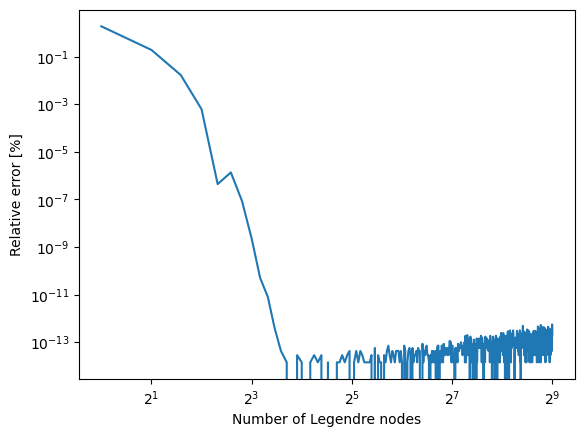

In [10]:
plt.plot(range(1, 513), error)
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of Legendre nodes")
plt.ylabel("Relative error [%]")
plt.show()

**Wyk. 2** - błąd względny dla metody gauss-legendre w zależności od ilości punktów kwadratury

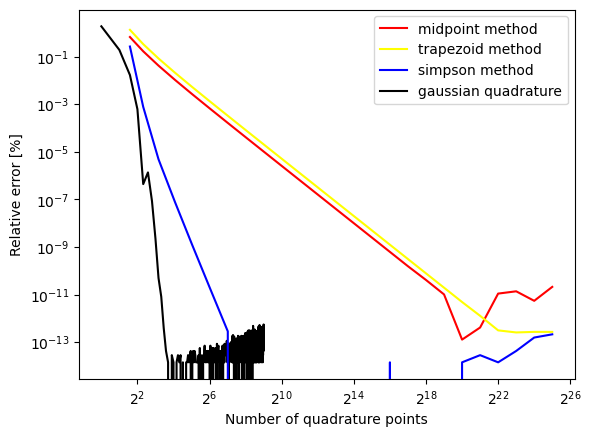

In [11]:
plt.plot(nodes, midpoint_error, label="midpoint method", color="red")
plt.plot(nodes, trapz_error, label="trapezoid method", color="yellow")
plt.plot(nodes, simpson_error, label="simpson method", color="blue", zorder=3)
plt.plot(range(1, 513), error, label="gaussian quadrature", color="black")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of quadrature points")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 3** - wykres wspólny błędów względnych dla wszystkich metod, w zależności od ilości punktów kwadratury

# Wnioski

Spośród wszystkich trzech metod kwadratura Gauss-Legendre jest najdokładniejsza. Trzeba uważać, żeby nie wykorzystać zbyt wielu punktów kwadratury, ponieważ błąd numeryczny zacznie wtedy znacząco przeważać nad błędem metody i zaburzy obliczenia.